In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
df = pd.read_csv('C:/Users/zahee/OneDrive - University of Hertfordshire/assignment/data_science_salaries.csv', index_col = 'job_title')
df.head(15)

,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
job_title,,,,,,,,,,
Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium
Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium
Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,United States,Medium
Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium


In [11]:
# To check missing values
print(df.isnull().sum())

experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64


In [12]:
#statistics for numerical columns
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


In [13]:
print(df['work_year'].value_counts())

work_year
2023    4625
2022    1112
2024     571
2021     216
2020      75
Name: count, dtype: int64


In [14]:
df.columns

Index(['experience_level', 'employment_type', 'work_models', 'work_year',
       'employee_residence', 'salary', 'salary_currency', 'salary_in_usd',
       'company_location', 'company_size'],
      dtype='object')

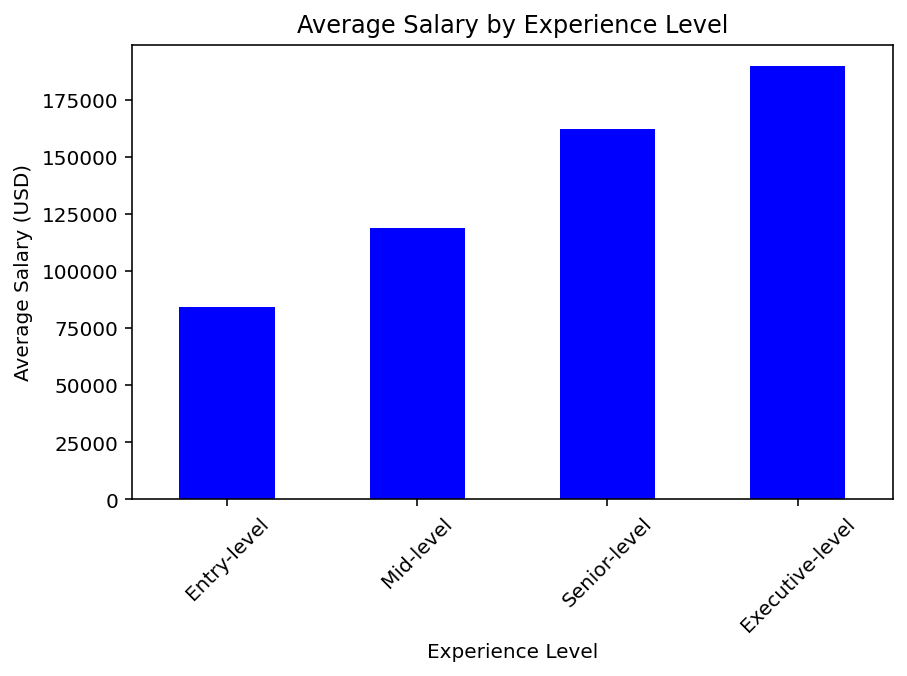

In [15]:
def plot_bar_chart(df):
    """
    Plots average salary by experience level as a bar chart
    """
    avg_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
    
    plt.figure(dpi=144)
    avg_salary.plot(kind='bar', color='blue')
    plt.title('Average Salary by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Average Salary (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_bar_chart(df)

<Figure size 921.6x691.2 with 0 Axes>

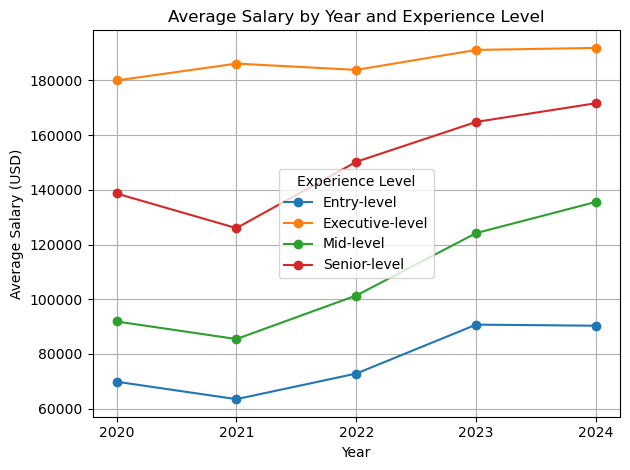

In [16]:
def plot_line_graph(df):
    """
    Plots the average salary by year for different experience levels.
    """
    plt.figure(dpi=144)
    avg_salary_by_year = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack()

    avg_salary_by_year.plot(marker='o')

    plt.title('Average Salary by Year and Experience Level')
    plt.xlabel('Year')
    plt.ylabel('Average Salary (USD)')
    plt.xticks(avg_salary_by_year.index) 
    plt.grid()
    plt.legend(title='Experience Level')
    plt.tight_layout()
    plt.show()
    return

plot_line_graph(df)

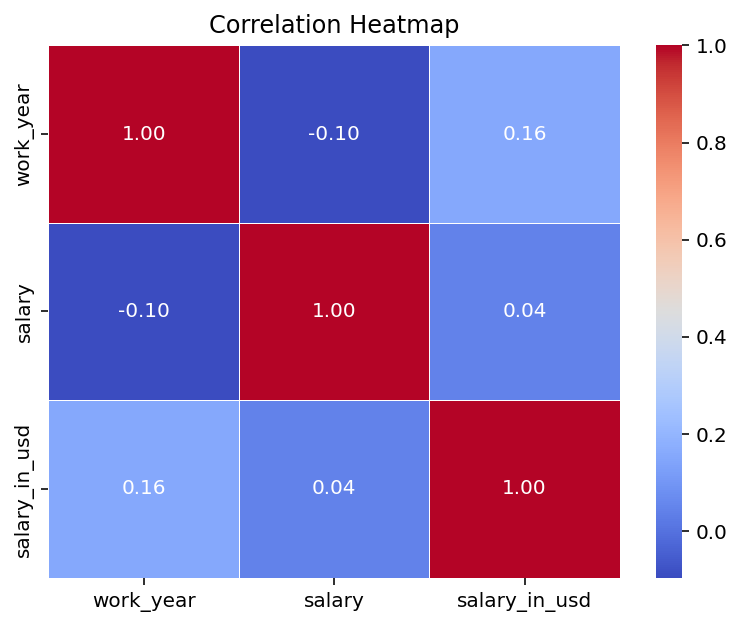

In [17]:
matrix = df.corr(numeric_only=True)

def plot_heatmap(matrix):
    plt.figure(dpi=144)
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap(matrix)